# WOA

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from copy import copy
from tqdm import tqdm


In [9]:
class WaterOptimization:
    def __init__(self, fitness_func, iterations, sample_size, dimensions, lb, ub, boundnum, bestboundp):
        self.iterations = iterations
        self.sample_size = sample_size
        self.dimensions = dimensions
        self.fitness_func = fitness_func
        self.lb = lb
        self.ub = ub
        self.diss = self.ub - self.lb
        self.boundnum = boundnum
        self.bestboundp = bestboundp
        self.boundl = self.diss / boundnum
        self.data = {
            'sample_size': self.sample_size,
            'iterations': self.iterations,
            'lb': self.lb,
            'ub': self.ub,
            'dis': self.diss,
            'boundnum': self.boundnum,
            'bestbp': self.bestboundp,
            'boundl': self.boundl
        }
        self.pop = self.initialize_population()
    
    class Individual:
        def __init__(self, sample_size, dimensions):
            self.h = np.zeros(shape=(sample_size, dimensions))
            self.fit = None
            self.t = None
    
    def initialize_population(self):
        pop = [self.Individual(self.sample_size, self.dimensions) for _ in range(self.sample_size)]
        for ind in pop:
            ind.h = np.random.uniform(self.lb, self.ub, size=(self.sample_size, self.dimensions))
            ind = self.fitness(ind)

        if not all(isinstance(ind.fit, (int, float)) for ind in pop):
            print(type(ind.fit))
            print(ind.fit)
            raise ValueError("Fitness value must be a scalar (int or float).")
        
        pop.sort(key=lambda x: x.fit)
        for ind in pop:
            ind.t = self.boundl
        return pop
    
    def fitness(self, individual):
        # Define your fitness function here
        # This is a placeholder, replace with your actual fitness calculation
        individual.fit = min([self.fitness_func(row) for row in individual.h])
        return individual
    
    def wateration(self, WateringPop):
        # Define your Wateration function here
        # This is a placeholder, replace with your actual Wateration calculation
        for ind in WateringPop:
            ind.h = np.random.uniform(self.lb, self.ub, size=(self.sample_size, self.dimensions))
            ind = self.fitness(ind)
        return WateringPop
    
    def run(self):
        BEST = np.zeros(self.iterations)
        MEAN = np.zeros(self.iterations)
        start_time = time.time()
        
        for iter in range(self.iterations):
            WateringPop = [self.Individual(self.sample_size, self.dimensions) for _ in range(self.sample_size)]
            WateringPop = self.wateration(WateringPop)
            
            self.pop.extend(WateringPop)
            self.pop.sort(key=lambda x: x.fit)
            gpop = self.pop[0]
            BestMule = round(0.5 * self.sample_size)
            randomi = self.sample_size - BestMule
            randomW = np.random.choice(range(BestMule, len(self.pop)), randomi, replace=False)
            
            self.pop = self.pop[:BestMule] + [self.pop[i] for i in randomW]
            self.pop.sort(key=lambda x: (x.t if x.t is not None else float('inf')))
            
            BEST[iter] = gpop.fit
            MEAN[iter] = np.mean([ind.fit for ind in self.pop])
            print(f' Iter = {iter}  BEST = {BEST[iter]}')
        
        print(f' Best x = {gpop.h}')
        print(f' Best Fitness = {gpop.fit}')
        print(f' Time = {time.time() - start_time}')
        
        return gpop.h, gpop.fit
        # plt.figure()
        # plt.semilogy(BEST, 'r')
        # plt.semilogy(MEAN, 'b')
        # plt.xlabel('Iteration')
        # plt.ylabel('Fitness')
        # plt.legend(['BEST', 'MEAN'])
        # plt.title('WaterOptimization')
        # plt.show()

In [17]:
# Parameters
iterations = 500
dim = 10
sample_size = 100
lb = -100
ub = 100
boundnum = 50
bestboundp = 0.2

# Run the Water Optimization Algorithm
woa = WaterOptimization(iterations, sample_size, dim, lb, ub, boundnum, bestboundp)
woa.run()

TypeError: WaterOptimization.__init__() missing 1 required positional argument: 'bestboundp'

# CECTesting

In [10]:
class CECTesting():
  def __init__(self, pop_size=10, generations=100, n_exps=30):
    self.pop_size = pop_size
    self.dims = 10
    self.generations=generations
    self.n_exps = n_exps

  def rastrigin(self, x):
    # Ensure x is a NumPy array
    if not isinstance(x, np.ndarray):
        x = np.array(x)

    d = len(x)
    return 10 * d + np.sum(np.square(x) - 10 * np.cos(2 * np.pi * x))+1

  def griewank(self, x):
      # Try to solve
      if not isinstance(x, np.ndarray):
          x = np.array(x)
      d = len(x)
      sum1 = np.sum(x**2)
      prod2 = np.prod(np.cos(x / np.sqrt( np.arange(1, d + 1))))
      return sum1 / 4000 - prod2 + 1

  def ackley(self, x):
      if not isinstance(x, np.ndarray):
          x = np.array(x)
      a = 20
      b = 0.2
      c = 2 * np.pi
      d = len(x)
      sum1 = np.sum(x**2)
      sum2 = np.sum(np.cos(c * x))
      return -a * np.exp(-b * np.sqrt(sum1 / d)) - np.exp(sum2 / d) + a + np.exp(1)+1

  def happy_cat_function(self, x):
      if not isinstance(x, np.ndarray):
          x = np.array(x)
      alpha = 1.0 / 8.0
      r2 = np.sum((x - 1.0) ** 2)
      sum_z = np.sum(x - 1.0)

      nx = len(x)
      f = np.power(np.abs(r2 - nx), 2 * alpha) + (0.5 * r2 + sum_z) / nx + 0.5
      return f+1

  def expanded_scaffer6_function(self, x):
      if not isinstance(x, np.ndarray):
          x = np.array(x)
      y = np.sum(0.5 + (np.sin(np.sqrt(x**2 + np.roll(x, -1)**2))**2 - 0.5) / (1 + 0.001 * (x**2 + np.roll(x, -1)**2))**2)
      return y+1

  def weierstrass_function(self, x, a=0.5, b=3.0, k_max=20):
      if not isinstance(x, np.ndarray):
          x = np.array(x)
      n = len(x)
      y = 0.0

      for i in range(n):
          sum_term = 0.0
          sum2_term = 0.0

          for j in range(k_max + 1):
              a_pow_j = a ** j
              b_pow_j = b ** j
              x_term = x[i] + 0.5

              cos_term = np.cos(2.0 * np.pi * b_pow_j * x_term)
              sum_term += a_pow_j * cos_term

              cos2_term = np.cos(2.0 * np.pi * b_pow_j * 0.5)
              sum2_term += a_pow_j * cos2_term

          y += sum_term
      y -= n * sum2_term
      return y+1

  def schwefel_func(self, x):
      if not isinstance(x, np.ndarray):
          x = np.array(x)
      nx = len(x)
      y = 0.0
      

      for i in range(nx):
          z = x[i] + 4.209687462275036e+002
          if z > 500:
              y -= (500.0 - (z % 500)) * np.sin(np.sqrt(500.0 - (z % 500)))
              tmp = (z - 500.0) / 100.0
              y += tmp**2 / nx
          elif z < -500:
              y -= (-500.0 + (abs(z) % 500)) * np.sin(np.sqrt(500.0 - (abs(z) % 500)))
              tmp = (z + 500.0) / 100.0
              y += tmp**2 / nx
          else:
              y -= z * np.sin(np.sqrt(abs(z)))

      y += 4.189828872724338e+002 * nx

      return y+1

  def Lennard_Jones(self, x):
      if not isinstance(x, np.ndarray):
          x = np.array(x)
      D = len(x)
      result = 0
      k = D // 3
      if k < 2:
          k = 2
          D = 6

      sum = 0.0
      for i in range(k - 1):
          for j in range(i + 1, k):
              a = 3 * i
              b = 3 * j
              xd = x[a] - x[b]
              yd = x[a + 1] - x[b + 1]
              zd = x[a + 2] - x[b + 2]
              ed = xd**2 + yd**2 + zd**2
              ud = ed**3
              if ud > 1.0e-10:
                  sum += (1.0 / ud - 2.0) * (1/ud)
              else:
                  sum += 1.0e20

      result += sum
      result += 12.7120622568

      return result+1

  def Hilbert(self, x):
      if not isinstance(x, np.ndarray):
          x = np.array(x)
      f = 0
      D = len(x)
      b = int(np.sqrt(D))

      sum = 0

      hilbert = np.zeros((b, b))
      y = np.zeros((b, b))

      for i in range(b):
          for j in range(b):
              hilbert[i][j] = 1.0 / np.longdouble(i + j + 1)

      for j in range(b):
          for k in range(b):
              y[j][k] = 0
              for i in range(b):
                  y[j][k] += hilbert[j][i] * x[k + b * i]

      for i in range(b):
          for j in range(b):
              if i == j:
                  sum += np.fabs(y[i][j] - 1)
              else:
                  sum += np.fabs(y[i][j])

      f += sum
      return f+1

  def Chebyshev(self, x):
      if not isinstance(x, np.ndarray):
          x = np.array(x)
      D = len(x)
      f = 0.0
      a = 1.0
      b = 1.2
      px = 0.0
      y = -1.0
      sum_val = 0.0
      dx = 0.0
      dy = 0.0
      sample = 32 * D

      for j in range(D - 2):
          dx = 2.4 * b - a
          a = b
          b = dx

      dy = 2.0 / sample

      for i in range(sample + 1):
          px = x[0]
          for j in range(1, D):
              px = y * px + x[j]
          if px < -1.0 or px > 1.0:
              sum_val += (1.0 - abs(px)) ** 2
          y += dy

      for i in [-1, 1]:
          px = x[0]
          for j in range(1, D):
              px = 1.2 * px + x[j]
          if px < dx:
              sum_val += px ** 2

      f += sum_val
      return f+1

  def wao_manager(self, target_function, boundaries, dims):
    wao_obj = WaterOptimization(fitness_func=target_function,
                  lb=boundaries[0],
                  ub=boundaries[1],
                  dimensions=dims,
                  boundnum = 50,
                  bestboundp = 0.5,
                  sample_size=self.pop_size,
                  iterations=self.generations)
    wao_solution = wao_obj.run()
    return wao_solution[0]

  def generate_report(self, opt_algo):
    opt_manager = self.wao_manager if opt_algo == "WAO" else self.wao_da_manager
    target_functions = [
      ("Rastrigin", self.rastrigin, (-100, 100), self.dims),
      ("Griewank", self.griewank, (-100, 100), self.dims),
    #   ("Ackley", self.ackley, (-100, 100), self.dims),
    #   ("Happy Cat", self.happy_cat_function, (-100, 100), self.dims),
    #   ("Expanded Scaffer6", self.expanded_scaffer6_function, (-100, 100), self.dims),
    #   ("Weierstrass", self.weierstrass_function, (-100, 100), self.dims),
    #   ("Schwefel", self.schwefel_func, (-100, 100), self.dims),
    #   ("Lennard_Jones", self.Lennard_Jones, (-4, 4), 18),
    #   ("Hilbert", self.Hilbert, (-16384, 16384), 16),
    #   ("Chebyshev", self.Chebyshev, (-8192, 8192), 9)
    ]
    results = []
    for eval_function in tqdm(target_functions, desc="Target Functions"):
        target_function_name, target_function, boundaries, dims = eval_function
        function_results = []
        for _ in tqdm(range(self.n_exps), desc="Experiments"):
            result = opt_manager(target_function, boundaries, dims)
            function_results.append(result)
        results.append({"target_function": target_function_name, "D": dims, "search_range": boundaries, "wao_evaluations": function_results})
    return results


In [11]:
cec_obj = CECTesting(pop_size=30, generations=500, n_exps=10)
results = cec_obj.generate_report(opt_algo="WAO")

Target Functions:   0%|          | 0/2 [00:00<?, ?it/s]

 Iter = 0  BEST = 6146.357330189653
 Iter = 1  BEST = 6146.357330189653
 Iter = 2  BEST = 6146.357330189653
 Iter = 3  BEST = 6146.357330189653
 Iter = 4  BEST = 6146.357330189653
 Iter = 5  BEST = 4066.4153057166036
 Iter = 6  BEST = 4066.4153057166036
 Iter = 7  BEST = 4066.4153057166036
 Iter = 8  BEST = 4066.4153057166036
 Iter = 9  BEST = 4066.4153057166036
 Iter = 10  BEST = 4066.4153057166036
 Iter = 11  BEST = 4066.4153057166036
 Iter = 12  BEST = 3347.2322322928085
 Iter = 13  BEST = 3347.2322322928085
 Iter = 14  BEST = 3347.2322322928085
 Iter = 15  BEST = 3347.2322322928085
 Iter = 16  BEST = 3347.2322322928085
 Iter = 17  BEST = 3347.2322322928085
 Iter = 18  BEST = 3347.2322322928085
 Iter = 19  BEST = 3347.2322322928085
 Iter = 20  BEST = 3347.2322322928085
 Iter = 21  BEST = 3347.2322322928085
 Iter = 22  BEST = 3347.2322322928085
 Iter = 23  BEST = 3347.2322322928085
 Iter = 24  BEST = 3347.2322322928085
 Iter = 25  BEST = 3347.2322322928085
 Iter = 26  BEST = 3347.232

 Iter = 479  BEST = 1660.8308923745747
 Iter = 480  BEST = 1660.8308923745747
 Iter = 481  BEST = 1660.8308923745747
 Iter = 482  BEST = 1660.8308923745747
 Iter = 483  BEST = 1660.8308923745747
 Iter = 484  BEST = 1660.8308923745747
 Iter = 485  BEST = 1660.8308923745747
 Iter = 486  BEST = 1660.8308923745747
 Iter = 487  BEST = 1660.8308923745747
 Iter = 488  BEST = 1660.8308923745747
 Iter = 489  BEST = 1660.8308923745747
 Iter = 490  BEST = 1660.8308923745747
 Iter = 491  BEST = 1660.8308923745747
 Iter = 492  BEST = 1660.8308923745747
 Iter = 493  BEST = 1660.8308923745747
 Iter = 494  BEST = 1660.8308923745747
 Iter = 495  BEST = 1660.8308923745747
 Iter = 496  BEST = 1660.8308923745747
 Iter = 497  BEST = 1660.8308923745747
 Iter = 498  BEST = 1660.8308923745747
 Iter = 499  BEST = 1660.8308923745747
 Best x = [[-14.92256844  94.59381101  12.03416138  87.52529861  87.52567176
  -35.003491   -83.26204614  40.71585606 -91.52614901  62.04043881]
 [  2.46021792  19.96759031  89.6842

 Iter = 481  BEST = 2823.182253973511
 Iter = 482  BEST = 2823.182253973511
 Iter = 483  BEST = 2823.182253973511
 Iter = 484  BEST = 2823.182253973511
 Iter = 485  BEST = 2823.182253973511
 Iter = 486  BEST = 2823.182253973511
 Iter = 487  BEST = 2823.182253973511
 Iter = 488  BEST = 2823.182253973511
 Iter = 489  BEST = 2823.182253973511
 Iter = 490  BEST = 2823.182253973511
 Iter = 491  BEST = 2823.182253973511
 Iter = 492  BEST = 2823.182253973511
 Iter = 493  BEST = 2823.182253973511
 Iter = 494  BEST = 2823.182253973511
 Iter = 495  BEST = 2823.182253973511
 Iter = 496  BEST = 2823.182253973511
 Iter = 497  BEST = 2823.182253973511
 Iter = 498  BEST = 2823.182253973511
 Iter = 499  BEST = 2823.182253973511
 Best x = [[ 45.45527766 -86.71273431 -81.32937021  36.28221843 -71.95896731
  -28.13983195  49.9322834   94.11588173 -74.36544853 -92.80437855]
 [-39.50187016  10.71222567 -19.92362698  15.19275629  86.84297204
   -8.44590211  82.57119297 -45.91254661  10.67366956 -38.28310767

 Iter = 489  BEST = 3410.7854423121107
 Iter = 490  BEST = 3410.7854423121107
 Iter = 491  BEST = 3410.7854423121107
 Iter = 492  BEST = 3410.7854423121107
 Iter = 493  BEST = 3410.7854423121107
 Iter = 494  BEST = 3410.7854423121107
 Iter = 495  BEST = 3410.7854423121107
 Iter = 496  BEST = 3410.7854423121107
 Iter = 497  BEST = 3410.7854423121107
 Iter = 498  BEST = 3410.7854423121107
 Iter = 499  BEST = 3410.7854423121107
 Best x = [[-54.44004169 -87.64746725 -91.98086779 -19.79238177  68.25375864
   82.74955369 -16.71202678  84.22510422  -6.09630956 -77.96350035]
 [-41.11989209 -87.2068153   38.77033989 -29.17002597 -16.98839499
  -23.44840438  62.65654336  11.07496861  12.4229165   78.888591  ]
 [-74.78790613  36.30377     62.83181065  43.95822182 -32.60486769
   34.13721841 -11.97393517  13.04262573  88.65589196 -97.04136859]
 [-33.07266994 -60.01237844  10.20511403 -36.3423072  -64.61433272
   17.52989459  35.07139016  31.02809516  40.42357515  29.47092882]
 [-96.02623523  67.15

 Iter = 489  BEST = 2801.6819567289913
 Iter = 490  BEST = 2801.6819567289913
 Iter = 491  BEST = 2801.6819567289913
 Iter = 492  BEST = 2801.6819567289913
 Iter = 493  BEST = 2801.6819567289913
 Iter = 494  BEST = 2801.6819567289913
 Iter = 495  BEST = 2801.6819567289913
 Iter = 496  BEST = 2801.6819567289913
 Iter = 497  BEST = 2801.6819567289913
 Iter = 498  BEST = 2801.6819567289913
 Iter = 499  BEST = 2801.6819567289913
 Best x = [[ 62.6376695   37.47849371  28.15515653  63.95866747 -30.9267767
   -0.87597944 -58.44285583  25.44772671 -27.31249989 -98.44615745]
 [ 44.10932881 -23.01680453  29.90104733 -87.50219304 -31.60500302
   33.49473181 -65.74881259 -47.82000165  65.32771921 -10.55617583]
 [-40.85976531  39.26394404 -62.63927496 -19.06188721 -52.76365961
   35.46657397 -30.54935688 -89.75617492 -64.96653881  27.15099209]
 [-94.47142942 -78.49631922 -89.05630537 -58.26494847 -85.61977787
   71.79250595 -98.03661001 -36.77577263  -5.54661331  71.71342622]
 [ 48.54949845  69.301

 Iter = 494  BEST = 2164.693995886584
 Iter = 495  BEST = 2164.693995886584
 Iter = 496  BEST = 2164.693995886584
 Iter = 497  BEST = 2164.693995886584
 Iter = 498  BEST = 2164.693995886584
 Iter = 499  BEST = 2164.693995886584
 Best x = [[-7.95325898e+01 -2.02600218e+01 -5.20378472e+01  6.31998948e+01
   9.05006085e+01  9.96100675e+01 -5.66151224e+01  2.76762332e+01
   2.83032087e+01 -1.04876195e+01]
 [ 8.63163897e+01  7.05742867e+01 -1.04136374e+01  4.45468192e+01
   2.66826657e+01  9.50175174e+00 -1.43226403e+01 -1.29531953e+01
  -1.01999890e+01 -2.92067575e+01]
 [-8.19878765e+01  8.88311782e+01 -4.22401917e+01  6.43169829e+00
  -5.05251495e+01  1.15532907e+01  1.50859272e+01 -6.98530091e+01
  -9.21559918e+00  1.98500449e+01]
 [-6.97746333e+01 -6.27286273e+01 -3.95198830e+01 -8.25289589e+01
  -8.88501243e+01  8.88979523e+01  7.13313811e+01  3.14198510e+01
   8.28062222e+01 -6.40158599e+01]
 [-4.65953798e+01 -9.97994577e+01  6.30550186e+01  9.90652611e+01
  -3.31226556e+01 -7.2261681

 Iter = 496  BEST = 2964.908714278554
 Iter = 497  BEST = 2964.908714278554
 Iter = 498  BEST = 2964.908714278554
 Iter = 499  BEST = 2964.908714278554
 Best x = [[ 86.00258655  88.83141066 -58.70615843  45.66598942 -56.38280349
   89.56186711 -63.2968561  -60.95561355 -58.34391662 -15.23323992]
 [-65.66561761  30.6412449  -31.85032942 -56.93871757  56.54248398
   31.94630484 -50.83970621 -61.92329065  45.46445308 -85.75606275]
 [ 87.10392941  16.11814912 -77.02931636  61.86356503 -39.84101599
  -52.11428205  52.01941628  16.09396874  64.71412468  50.45424545]
 [ 59.79852575  11.89034891  18.03609292  54.37915718 -30.38684919
  -35.32177356 -74.40021129  40.82339877  76.61407713 -94.94026242]
 [-31.49382605  -5.60193362   0.98847887  -8.10250187   4.68798934
   62.03288068 -50.1051757  -88.7579776   83.03856809  27.22274636]
 [-88.3431912  -62.13661618  55.07139643 -84.8647978   68.85242374
   29.32406044  30.43783092  76.73960551   1.60897382  46.78462305]
 [ 76.45454774  16.68723374 

 Iter = 484  BEST = 1857.7448745084462
 Iter = 485  BEST = 1857.7448745084462
 Iter = 486  BEST = 1857.7448745084462
 Iter = 487  BEST = 1857.7448745084462
 Iter = 488  BEST = 1857.7448745084462
 Iter = 489  BEST = 1857.7448745084462
 Iter = 490  BEST = 1857.7448745084462
 Iter = 491  BEST = 1857.7448745084462
 Iter = 492  BEST = 1857.7448745084462
 Iter = 493  BEST = 1857.7448745084462
 Iter = 494  BEST = 1857.7448745084462
 Iter = 495  BEST = 1857.7448745084462
 Iter = 496  BEST = 1857.7448745084462
 Iter = 497  BEST = 1857.7448745084462
 Iter = 498  BEST = 1857.7448745084462
 Iter = 499  BEST = 1857.7448745084462
 Best x = [[-4.41731497e+01 -4.14272336e+01  2.69674707e+01  2.11822170e+01
   1.87683142e+01  1.12655263e+01  4.43633108e+01 -1.60056106e+00
   8.65628519e+01  3.77717296e+01]
 [ 3.30599730e+01  9.68125222e+01 -2.30106310e+01  7.33356464e+01
   6.75679152e+01 -6.07869261e+01  1.73206233e+01 -9.83139227e+01
   1.47650174e+01 -6.45484392e+01]
 [ 9.47916160e+01  2.71197584e+0

 Iter = 483  BEST = 2530.5660972697333
 Iter = 484  BEST = 2530.5660972697333
 Iter = 485  BEST = 2530.5660972697333
 Iter = 486  BEST = 2530.5660972697333
 Iter = 487  BEST = 2530.5660972697333
 Iter = 488  BEST = 2530.5660972697333
 Iter = 489  BEST = 2530.5660972697333
 Iter = 490  BEST = 2530.5660972697333
 Iter = 491  BEST = 2530.5660972697333
 Iter = 492  BEST = 2530.5660972697333
 Iter = 493  BEST = 2530.5660972697333
 Iter = 494  BEST = 2530.5660972697333
 Iter = 495  BEST = 2530.5660972697333
 Iter = 496  BEST = 2530.5660972697333
 Iter = 497  BEST = 2530.5660972697333
 Iter = 498  BEST = 2530.5660972697333
 Iter = 499  BEST = 2530.5660972697333
 Best x = [[ 5.59025766e+01 -4.37856902e+01  3.48406228e+01  3.40762615e+01
  -9.74173614e+01 -6.02730128e+01  1.61647484e+01  2.50095834e+00
   5.95253541e+01  7.94509963e+01]
 [-8.41810436e+00  6.72140327e+00 -1.98650030e+01 -1.54599924e+01
  -2.00894402e+01  2.75496643e+00 -3.72508713e+00 -1.27782164e+01
   3.27797328e+01 -2.6155136

 Iter = 476  BEST = 2409.443362582948
 Iter = 477  BEST = 2409.443362582948
 Iter = 478  BEST = 2409.443362582948
 Iter = 479  BEST = 2409.443362582948
 Iter = 480  BEST = 2409.443362582948
 Iter = 481  BEST = 2409.443362582948
 Iter = 482  BEST = 2409.443362582948
 Iter = 483  BEST = 2409.443362582948
 Iter = 484  BEST = 2409.443362582948
 Iter = 485  BEST = 2409.443362582948
 Iter = 486  BEST = 2409.443362582948
 Iter = 487  BEST = 2409.443362582948
 Iter = 488  BEST = 2409.443362582948
 Iter = 489  BEST = 2409.443362582948
 Iter = 490  BEST = 2409.443362582948
 Iter = 491  BEST = 2409.443362582948
 Iter = 492  BEST = 2409.443362582948
 Iter = 493  BEST = 2409.443362582948
 Iter = 494  BEST = 2409.443362582948
 Iter = 495  BEST = 2409.443362582948
 Iter = 496  BEST = 2409.443362582948
 Iter = 497  BEST = 2409.443362582948
 Iter = 498  BEST = 2409.443362582948
 Iter = 499  BEST = 2409.443362582948
 Best x = [[-86.68572702 -11.90905715 -92.85659867 -46.11151106  12.45358543
  -95.89207

Experiments:  90%|█████████ | 9/10 [00:36<00:04,  4.21s/it]

 Iter = 0  BEST = 6165.659668388676
 Iter = 1  BEST = 6165.659668388676
 Iter = 2  BEST = 4840.023687645869
 Iter = 3  BEST = 4840.023687645869
 Iter = 4  BEST = 4840.023687645869
 Iter = 5  BEST = 4840.023687645869
 Iter = 6  BEST = 4840.023687645869
 Iter = 7  BEST = 4840.023687645869
 Iter = 8  BEST = 4840.023687645869
 Iter = 9  BEST = 4840.023687645869
 Iter = 10  BEST = 4840.023687645869
 Iter = 11  BEST = 4840.023687645869
 Iter = 12  BEST = 4840.023687645869
 Iter = 13  BEST = 4840.023687645869
 Iter = 14  BEST = 4840.023687645869
 Iter = 15  BEST = 4840.023687645869
 Iter = 16  BEST = 4840.023687645869
 Iter = 17  BEST = 4840.023687645869
 Iter = 18  BEST = 4840.023687645869
 Iter = 19  BEST = 4840.023687645869
 Iter = 20  BEST = 4840.023687645869
 Iter = 21  BEST = 4840.023687645869
 Iter = 22  BEST = 4840.023687645869
 Iter = 23  BEST = 4840.023687645869
 Iter = 24  BEST = 4840.023687645869
 Iter = 25  BEST = 4840.023687645869
 Iter = 26  BEST = 3618.969480966711
 Iter = 27 

Target Functions:  50%|█████     | 1/2 [00:41<00:41, 41.40s/it]

 Iter = 480  BEST = 3350.9001410628307
 Iter = 481  BEST = 3350.9001410628307
 Iter = 482  BEST = 3350.9001410628307
 Iter = 483  BEST = 3350.9001410628307
 Iter = 484  BEST = 3350.9001410628307
 Iter = 485  BEST = 3350.9001410628307
 Iter = 486  BEST = 3350.9001410628307
 Iter = 487  BEST = 3350.9001410628307
 Iter = 488  BEST = 3350.9001410628307
 Iter = 489  BEST = 3350.9001410628307
 Iter = 490  BEST = 3350.9001410628307
 Iter = 491  BEST = 3350.9001410628307
 Iter = 492  BEST = 3350.9001410628307
 Iter = 493  BEST = 3350.9001410628307
 Iter = 494  BEST = 3350.9001410628307
 Iter = 495  BEST = 3350.9001410628307
 Iter = 496  BEST = 3350.9001410628307
 Iter = 497  BEST = 3350.9001410628307
 Iter = 498  BEST = 3350.9001410628307
 Iter = 499  BEST = 3350.9001410628307
 Best x = [[ 98.23306176  18.58311299  70.84414161  87.57722325  92.7841827
    2.46881103  80.35140402 -98.22980283  20.69503038  83.05609503]
 [-11.94133753  20.04773724  42.38250539 -60.2915998  -42.47713435
  -37.687

 Iter = 0  BEST = 2.600665091100405
 Iter = 1  BEST = 2.600665091100405
 Iter = 2  BEST = 2.600665091100405
 Iter = 3  BEST = 2.5299585296214318
 Iter = 4  BEST = 2.0565423593852215
 Iter = 5  BEST = 2.0565423593852215
 Iter = 6  BEST = 2.0565423593852215
 Iter = 7  BEST = 2.0565423593852215
 Iter = 8  BEST = 2.0565423593852215
 Iter = 9  BEST = 2.0565423593852215
 Iter = 10  BEST = 2.0565423593852215
 Iter = 11  BEST = 2.0565423593852215
 Iter = 12  BEST = 2.0565423593852215
 Iter = 13  BEST = 2.0565423593852215
 Iter = 14  BEST = 2.0565423593852215
 Iter = 15  BEST = 2.0565423593852215
 Iter = 16  BEST = 2.0565423593852215
 Iter = 17  BEST = 2.0565423593852215
 Iter = 18  BEST = 2.0565423593852215
 Iter = 19  BEST = 2.0565423593852215
 Iter = 20  BEST = 2.0565423593852215
 Iter = 21  BEST = 2.0565423593852215
 Iter = 22  BEST = 2.0565423593852215
 Iter = 23  BEST = 2.0565423593852215
 Iter = 24  BEST = 2.0565423593852215
 Iter = 25  BEST = 2.0565423593852215
 Iter = 26  BEST = 2.0565

 Iter = 482  BEST = 1.7146241854741018
 Iter = 483  BEST = 1.7146241854741018
 Iter = 484  BEST = 1.7146241854741018
 Iter = 485  BEST = 1.7146241854741018
 Iter = 486  BEST = 1.7146241854741018
 Iter = 487  BEST = 1.7146241854741018
 Iter = 488  BEST = 1.7146241854741018
 Iter = 489  BEST = 1.7146241854741018
 Iter = 490  BEST = 1.7146241854741018
 Iter = 491  BEST = 1.7146241854741018
 Iter = 492  BEST = 1.7146241854741018
 Iter = 493  BEST = 1.7146241854741018
 Iter = 494  BEST = 1.7146241854741018
 Iter = 495  BEST = 1.7146241854741018
 Iter = 496  BEST = 1.7146241854741018
 Iter = 497  BEST = 1.7146241854741018
 Iter = 498  BEST = 1.7146241854741018
 Iter = 499  BEST = 1.7146241854741018
 Best x = [[ 25.22785905  94.30683453 -79.46690679 -47.61822627  36.14242887
   62.90772529  48.63250039 -34.91985369 -58.40046486   5.19445986]
 [ 49.96527127  20.85259005 -25.79867657 -80.60390415 -95.01682558
  -56.89848243 -47.47562064  42.5038229  -19.65021031  -5.19972582]
 [-41.7137026   76

Experiments:  10%|█         | 1/10 [00:05<00:50,  5.59s/it]

 Iter = 0  BEST = 2.549655759963671
 Iter = 1  BEST = 2.549655759963671
 Iter = 2  BEST = 2.549655759963671
 Iter = 3  BEST = 2.549655759963671
 Iter = 4  BEST = 2.3015555846427533
 Iter = 5  BEST = 2.3015555846427533
 Iter = 6  BEST = 2.3015555846427533
 Iter = 7  BEST = 2.3015555846427533
 Iter = 8  BEST = 2.3015555846427533
 Iter = 9  BEST = 2.3015555846427533
 Iter = 10  BEST = 2.3015555846427533
 Iter = 11  BEST = 2.3015555846427533
 Iter = 12  BEST = 2.3015555846427533
 Iter = 13  BEST = 2.3015555846427533
 Iter = 14  BEST = 2.3015555846427533
 Iter = 15  BEST = 1.9052188034972906
 Iter = 16  BEST = 1.9052188034972906
 Iter = 17  BEST = 1.9052188034972906
 Iter = 18  BEST = 1.9052188034972906
 Iter = 19  BEST = 1.9052188034972906
 Iter = 20  BEST = 1.9052188034972906
 Iter = 21  BEST = 1.9052188034972906
 Iter = 22  BEST = 1.9052188034972906
 Iter = 23  BEST = 1.9052188034972906
 Iter = 24  BEST = 1.9052188034972906
 Iter = 25  BEST = 1.9052188034972906
 Iter = 26  BEST = 1.90521

 Iter = 484  BEST = 1.4153071676875522
 Iter = 485  BEST = 1.4153071676875522
 Iter = 486  BEST = 1.4153071676875522
 Iter = 487  BEST = 1.4153071676875522
 Iter = 488  BEST = 1.4153071676875522
 Iter = 489  BEST = 1.4153071676875522
 Iter = 490  BEST = 1.4153071676875522
 Iter = 491  BEST = 1.4153071676875522
 Iter = 492  BEST = 1.4153071676875522
 Iter = 493  BEST = 1.4153071676875522
 Iter = 494  BEST = 1.4153071676875522
 Iter = 495  BEST = 1.4153071676875522
 Iter = 496  BEST = 1.4153071676875522
 Iter = 497  BEST = 1.4153071676875522
 Iter = 498  BEST = 1.4153071676875522
 Iter = 499  BEST = 1.4153071676875522
 Best x = [[ 66.92802898  61.25182483  18.11814089 -39.1333179   29.22126821
  -47.97727061 -46.26337963  88.6219016   26.43704126  -3.64387363]
 [  0.32790114 -63.6576953  -85.59605209 -32.48441057  41.84170535
   47.99467608  16.39630539 -42.02161973  -2.19604177 -39.81161599]
 [  7.87920605  53.1989098   54.13059157  89.24899097  81.5868949
  -95.34322915  45.89101981  1

 Iter = 491  BEST = 1.4564474762704054
 Iter = 492  BEST = 1.4564474762704054
 Iter = 493  BEST = 1.4564474762704054
 Iter = 494  BEST = 1.4564474762704054
 Iter = 495  BEST = 1.4564474762704054
 Iter = 496  BEST = 1.4564474762704054
 Iter = 497  BEST = 1.4564474762704054
 Iter = 498  BEST = 1.4564474762704054
 Iter = 499  BEST = 1.4564474762704054
 Best x = [[ -6.64306956  24.67058726  77.24227953  72.74647551 -46.96047195
  -14.70710167  14.3674124   68.31278112  62.6537052  -38.7859451 ]
 [-60.3321142  -84.3177123   19.73924506  45.73453708  11.81464357
    2.88499201  54.13144257   8.50792758  16.54103603 -49.17528306]
 [-11.51869104   2.5472611   14.71287697  13.43399125   3.11410035
  -23.44394968  22.25268185   9.7893959    4.95714286  10.63231177]
 [-96.61528355  46.42930305  35.6677983   -7.15818859 -34.28275784
  -22.44236174  63.73815486 -39.42632088  17.33089154 -71.63463267]
 [-68.4605797   32.21826271 -66.54128416 -17.00058279 -94.63586542
  -55.09103488 -83.95433465 -82.

 Iter = 484  BEST = 1.6525291704354919
 Iter = 485  BEST = 1.6525291704354919
 Iter = 486  BEST = 1.6525291704354919
 Iter = 487  BEST = 1.6525291704354919
 Iter = 488  BEST = 1.6525291704354919
 Iter = 489  BEST = 1.6525291704354919
 Iter = 490  BEST = 1.6525291704354919
 Iter = 491  BEST = 1.6525291704354919
 Iter = 492  BEST = 1.6525291704354919
 Iter = 493  BEST = 1.6525291704354919
 Iter = 494  BEST = 1.6525291704354919
 Iter = 495  BEST = 1.6525291704354919
 Iter = 496  BEST = 1.6525291704354919
 Iter = 497  BEST = 1.6525291704354919
 Iter = 498  BEST = 1.6525291704354919
 Iter = 499  BEST = 1.6525291704354919
 Best x = [[-54.15974321 -10.57078048  38.85114776 -77.79623604 -26.14881791
   58.52860635  55.32128148  35.07622946  65.64485639 -65.53434059]
 [-51.10722838 -14.51040108   1.99355159 -36.12268953 -16.62079702
   40.50699384 -22.05784073  13.94667924  75.0939924   -9.91952053]
 [-30.18435674  86.39691291  71.84408665  23.38220872 -65.97283845
  -25.62829235  52.73541499  

 Iter = 488  BEST = 1.6786454527013237
 Iter = 489  BEST = 1.6786454527013237
 Iter = 490  BEST = 1.6786454527013237
 Iter = 491  BEST = 1.6786454527013237
 Iter = 492  BEST = 1.6786454527013237
 Iter = 493  BEST = 1.6786454527013237
 Iter = 494  BEST = 1.6786454527013237
 Iter = 495  BEST = 1.6786454527013237
 Iter = 496  BEST = 1.6786454527013237
 Iter = 497  BEST = 1.6786454527013237
 Iter = 498  BEST = 1.6786454527013237
 Iter = 499  BEST = 1.6786454527013237
 Best x = [[ 59.7606022  -81.97662596  57.29068946  47.76187281  32.79905538
   44.51972785  34.59196481  51.02807219 -24.3821762  -44.42275989]
 [-99.53118912  39.20946081 -93.73972593   9.27112924  62.46646767
   61.21342193  51.79694818 -99.59428972  78.07035629 -42.48333581]
 [ 61.39806035  15.05895986 -29.76306732 -20.19911449 -24.87225338
   49.3173639  -85.22445774   5.80665887 -32.36734765   8.34812305]
 [ -1.9869033  -47.28902694  22.8821597   35.45755611 -36.68275977
   58.92180634 -36.65622608 -95.76834883 -28.51948

 Iter = 486  BEST = 1.5707839628670532
 Iter = 487  BEST = 1.5707839628670532
 Iter = 488  BEST = 1.5707839628670532
 Iter = 489  BEST = 1.5707839628670532
 Iter = 490  BEST = 1.5707839628670532
 Iter = 491  BEST = 1.5707839628670532
 Iter = 492  BEST = 1.5707839628670532
 Iter = 493  BEST = 1.5707839628670532
 Iter = 494  BEST = 1.5707839628670532
 Iter = 495  BEST = 1.5707839628670532
 Iter = 496  BEST = 1.5707839628670532
 Iter = 497  BEST = 1.5707839628670532
 Iter = 498  BEST = 1.5707839628670532
 Iter = 499  BEST = 1.5707839628670532
 Best x = [[-1.68105595e-01  1.57212548e+01  8.75573134e+00 -8.14981246e+00
   2.56744381e+01  9.25145346e-01  1.67773240e+01 -2.83883904e+01
   5.57567920e+00 -1.11046656e+01]
 [ 9.67734108e+01  6.39145130e+01 -5.26539009e+01 -5.62120643e+01
  -4.76949290e+01 -9.97833635e+01  7.48046301e+01 -3.91253281e+01
   2.80753780e+01  1.45722809e+01]
 [ 8.37601581e+01  8.58795660e+00  8.41502156e+01 -2.70001194e+01
   4.14062849e+00  4.30171727e+01  5.0441446

 Iter = 482  BEST = 1.6905257304882446
 Iter = 483  BEST = 1.6905257304882446
 Iter = 484  BEST = 1.6905257304882446
 Iter = 485  BEST = 1.6905257304882446
 Iter = 486  BEST = 1.6905257304882446
 Iter = 487  BEST = 1.6905257304882446
 Iter = 488  BEST = 1.6905257304882446
 Iter = 489  BEST = 1.6905257304882446
 Iter = 490  BEST = 1.6905257304882446
 Iter = 491  BEST = 1.6905257304882446
 Iter = 492  BEST = 1.6905257304882446
 Iter = 493  BEST = 1.6905257304882446
 Iter = 494  BEST = 1.6905257304882446
 Iter = 495  BEST = 1.6905257304882446
 Iter = 496  BEST = 1.6905257304882446
 Iter = 497  BEST = 1.6905257304882446
 Iter = 498  BEST = 1.6905257304882446
 Iter = 499  BEST = 1.6905257304882446
 Best x = [[ 97.7599424   46.05410352 -54.96692333  94.89453083 -66.33897526
  -79.73350929  21.55770072  10.68723877 -89.89475159  65.24320744]
 [ 98.13807968  77.40561189 -21.2863275   76.13469389 -67.36836357
   71.91180631 -71.44182651 -52.13264468   2.95556978  32.91798326]
 [-83.07772286   5

Experiments:  70%|███████   | 7/10 [00:39<00:16,  5.64s/it]

 Iter = 0  BEST = 2.5503351159079277
 Iter = 1  BEST = 2.5503351159079277
 Iter = 2  BEST = 2.5503351159079277
 Iter = 3  BEST = 2.5503351159079277
 Iter = 4  BEST = 2.5503351159079277
 Iter = 5  BEST = 2.5503351159079277
 Iter = 6  BEST = 2.5503351159079277
 Iter = 7  BEST = 2.5503351159079277
 Iter = 8  BEST = 2.5503351159079277
 Iter = 9  BEST = 2.5503351159079277
 Iter = 10  BEST = 2.5503351159079277
 Iter = 11  BEST = 2.5503351159079277
 Iter = 12  BEST = 2.5503351159079277
 Iter = 13  BEST = 2.5503351159079277
 Iter = 14  BEST = 2.5503351159079277
 Iter = 15  BEST = 2.5503351159079277
 Iter = 16  BEST = 2.5503351159079277
 Iter = 17  BEST = 2.5503351159079277
 Iter = 18  BEST = 2.5503351159079277
 Iter = 19  BEST = 2.5503351159079277
 Iter = 20  BEST = 2.5503351159079277
 Iter = 21  BEST = 2.5503351159079277
 Iter = 22  BEST = 2.5503351159079277
 Iter = 23  BEST = 2.5503351159079277
 Iter = 24  BEST = 2.5503351159079277
 Iter = 25  BEST = 2.5503351159079277
 Iter = 26  BEST = 2.5

 Iter = 491  BEST = 1.3428823326758685
 Iter = 492  BEST = 1.3428823326758685
 Iter = 493  BEST = 1.3428823326758685
 Iter = 494  BEST = 1.3428823326758685
 Iter = 495  BEST = 1.3428823326758685
 Iter = 496  BEST = 1.3428823326758685
 Iter = 497  BEST = 1.3428823326758685
 Iter = 498  BEST = 1.3428823326758685
 Iter = 499  BEST = 1.3428823326758685
 Best x = [[-93.66226774   0.60887972  16.9595989  -17.51829642  54.50203219
   -9.26959343 -37.60587568 -74.91243711  24.79499472  35.65848673]
 [  9.88280429  67.39041324 -77.15239133  33.19139421 -94.08286859
   54.65344582 -20.28148133 -43.62737396  46.59993215  18.62820832]
 [-75.13253545 -32.89059415 -93.36908449 -77.13423038  15.36972765
  -29.74583678 -14.51530426  13.18295826  79.24561459  66.60960855]
 [-53.90239757 -35.47612892 -20.54069634 -78.33546812 -63.26740899
   -1.3300257  -86.43301059 -80.21092054  22.24318987 -76.41207336]
 [ 61.98392157 -53.22303581  93.11429286 -68.48403032 -64.64903854
  -48.15695246 -91.49542024 -98.

 Iter = 496  BEST = 1.5184652002396
 Iter = 497  BEST = 1.5184652002396
 Iter = 498  BEST = 1.5184652002396
 Iter = 499  BEST = 1.5184652002396
 Best x = [[ 76.21886949 -72.57689296 -75.1483015  -36.52374074  53.35842601
  -87.83377345   7.37300178  63.66161359 -25.35512083 -63.3430327 ]
 [-65.69674674 -42.68227596  60.51883017 -49.69442886  21.29797999
   10.35218657  -2.58660677 -97.23143801  48.48984491 -99.47268809]
 [ 87.16272716  24.41587285  14.25157786 -97.02442877  41.92411892
   67.81106677 -18.06369559  -8.88273148  26.40929717  81.65210249]
 [ 48.67922627  44.51440043 -12.82849114 -90.16046196 -43.09478231
  -70.94677222  60.94157329 -41.94874004 -58.64787321 -97.97953208]
 [ 45.47547167   3.59665884 -40.57634534  73.33672059   8.7891105
  -75.95993914  12.29318059 -75.64412119 -94.50746983  80.10780467]
 [ 88.29519042 -72.64519998  85.7294826  -70.27758627 -81.29489592
   12.87968821 -91.93614049  27.24820836 -42.86249448  19.9532043 ]
 [ 99.91350359 -80.09481936 -34.03260

Target Functions: 100%|██████████| 2/2 [01:37<00:00, 48.89s/it]

 Iter = 498  BEST = 1.5876265022220055
 Iter = 499  BEST = 1.5876265022220055
 Best x = [[ 85.5677316   51.14263356 -88.50609766  99.49823338  67.02660807
    2.45987398  86.52083409 -55.82270833  52.05033267 -92.93465307]
 [-76.42733676  -9.04988932  32.13328552   4.47693427 -30.83834478
   61.65679543  81.96696345 -64.64989729 -20.30230456 -62.3448138 ]
 [-28.16112175   9.03741695  39.62962542 -84.80726059 -85.26620924
  -31.92862366 -10.99828901  31.36128669   1.74983298 -11.1320433 ]
 [-54.98954123   4.99379159  93.95287745  27.34709395  24.43082076
  -86.81720361  29.84904991  65.33923312  52.84468058   4.46147898]
 [ 28.3933105  -60.88602302  33.39527474  50.08735278  82.64867777
   39.44678191 -84.46753002 -52.47786257 -87.04303152  66.81472728]
 [ 22.84864692  11.6144583  -96.27396011 -65.14678332  75.43951198
   -3.06771283   4.3455784  -55.94930792 -41.24002712  84.21279527]
 [ 95.62423114  22.44100312  81.20185308 -63.06435755   2.25956937
   42.49991583 -87.15034723  19.085

In [6]:
import json
with open("./algorithm_performance_results_WAO_1.json", "w") as f:
  json.dump(results, f, indent=4)

In [7]:
import json
import numpy as np

with open("./algorithm_performance_results_WAO_1.json", "r") as f:
    data_json = json.load(f)
da_evals = []
for eval_dict in data_json:
    temp_da_evals = {}
    avg_itrs = np.round(np.array(eval_dict["wao_evaluations"]).mean(axis=0), 4)
    temp_da_evals["target_function"] = eval_dict["target_function"]
    temp_da_evals["avg_eval_per_iteration"] = avg_itrs
    temp_da_evals["Fi* = Fi(x*)"] = 1
    temp_da_evals["Best"] = avg_itrs.min()
    temp_da_evals["Worst"] = avg_itrs.max()
    temp_da_evals["AVG"] = np.mean(avg_itrs)
    temp_da_evals["median"] = np.median(avg_itrs)
    temp_da_evals["STD"] = avg_itrs.std()
    da_evals.append(temp_da_evals)

In [8]:
da_evals

[{'target_function': 'Rastrigin',
  'avg_eval_per_iteration': np.float64(2124.6155),
  'Fi*\u2009=\u2009Fi(x*)': 1,
  'Best': np.float64(2124.6155),
  'Worst': np.float64(2124.6155),
  'AVG': np.float64(2124.6155),
  'median': np.float64(2124.6155),
  'STD': np.float64(0.0)},
 {'target_function': 'Griewank',
  'avg_eval_per_iteration': np.float64(1.4824),
  'Fi*\u2009=\u2009Fi(x*)': 1,
  'Best': np.float64(1.4824),
  'Worst': np.float64(1.4824),
  'AVG': np.float64(1.4824),
  'median': np.float64(1.4824),
  'STD': np.float64(0.0)}]

Plot saved as ./report/Rastrigin.png


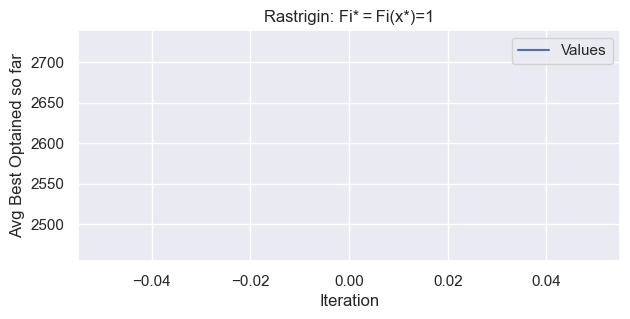

Plot saved as ./report/Griewank.png


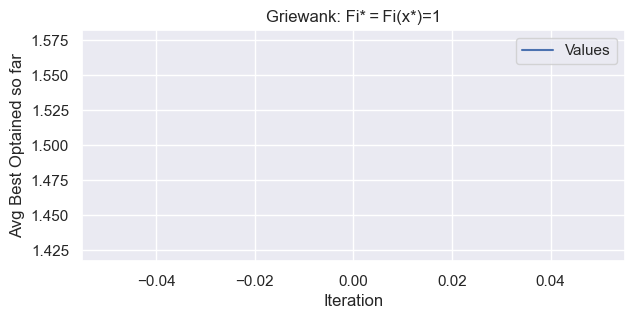

Plot saved as ./report/Ackley.png


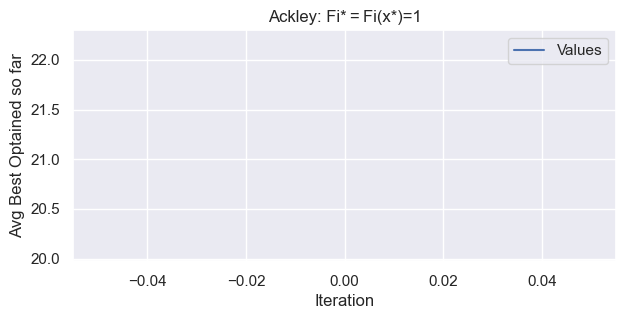

Plot saved as ./report/Happy Cat.png


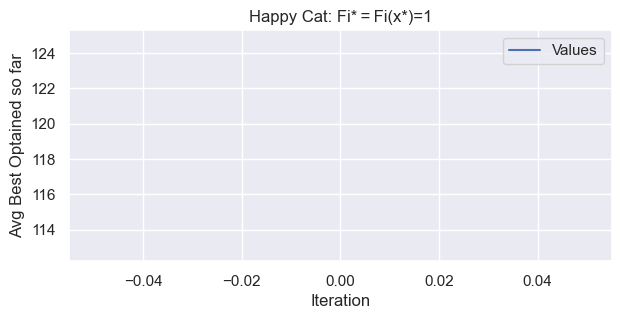

Plot saved as ./report/Expanded Scaffer6.png


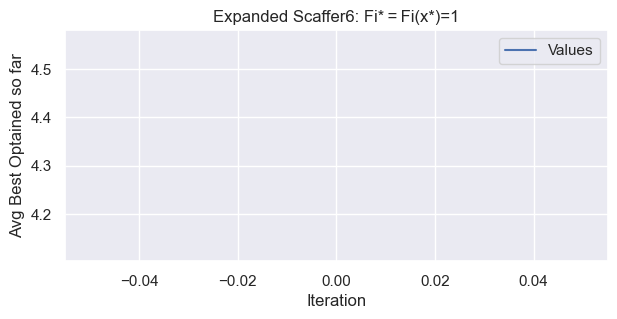

Plot saved as ./report/Weierstrass.png


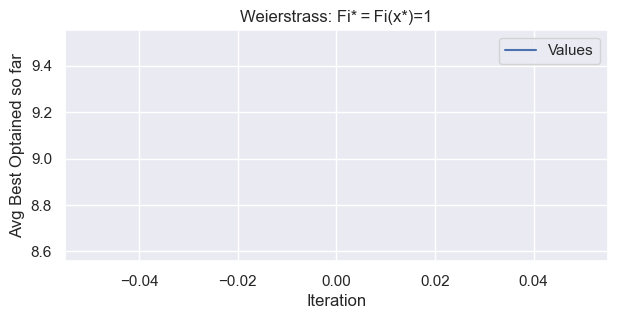

Plot saved as ./report/Schwefel.png


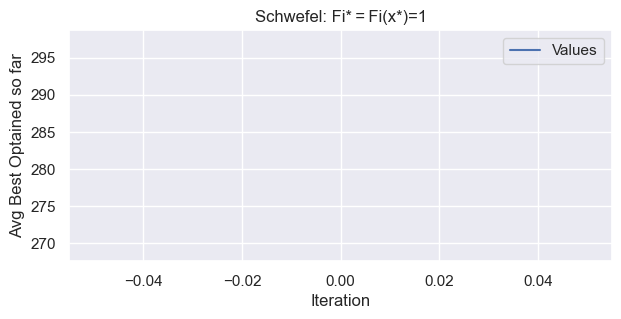

Plot saved as ./report/Lennard_Jones.png


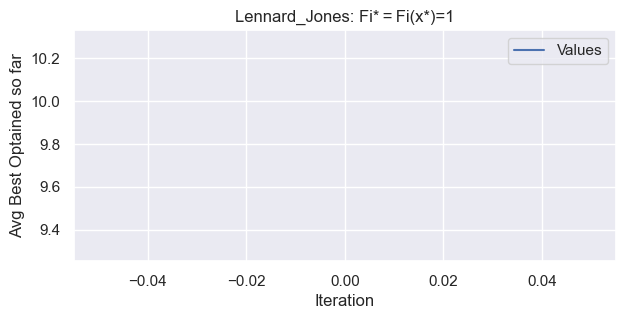

Plot saved as ./report/Hilbert.png


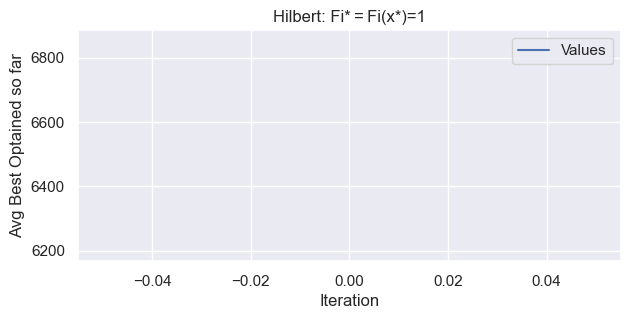

Plot saved as ./report/Chebyshev.png


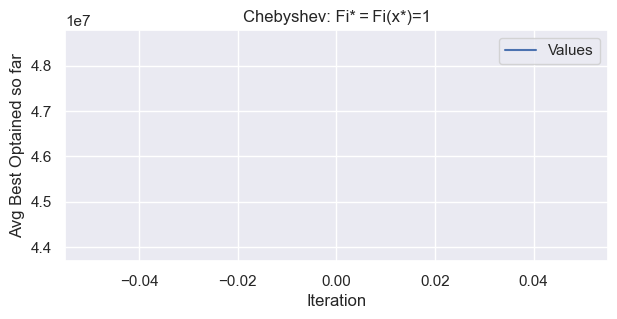

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_report = pd.DataFrame(da_evals)
df_report[[c for c in df_report.columns if c != "avg_eval_per_iteration"]].to_excel("./report/CEC_functions_WAO_Evaluation_Report.xlsx", index=None)

def plot_values_with_seaborn(values, title='My Plot', x_label='X-axis', y_label='Y-axis', save_path=None, highlight_value=None, highlight_color='red'):
    # Check if 'values' is a list, raise an error if not
    if not isinstance(values, list):
        raise ValueError('Values must be a list.')

    # Set the style of seaborn
    sns.set_theme()

    # Prepare the data for plotting
    data = {'Index': list(range(len(values))), 'Values': values}

    # Initialize the matplotlib figure
    plt.figure(figsize=(7, 3))

    # Create a seaborn lineplot
    line = sns.lineplot(data=data, x='Index', y='Values', label='Values')

    # Highlight the specified y-value if provided
    if highlight_value is not None:
        for i, value in enumerate(values):
            if value == highlight_value:
                plt.plot(i, value, color=highlight_color, label='Min Value')

    # Set the title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Avoiding duplicate labels in the legend
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    # plt.legend(by_label.values(), by_label.keys())

    # Show grid
    plt.grid(True)

    # Save the plot as an image if a save_path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        print(f"Plot saved as {save_path}")

    # Show the plot
    plt.show()
for _, row in df_report.iterrows():
    plot_values_with_seaborn([row["avg_eval_per_iteration"]], title=f'{row["target_function"]}: Fi* = Fi(x*)={row["Fi* = Fi(x*)"]}', x_label='Iteration', y_label='Avg Best Optained so far', save_path=f'./report/{row["target_function"]}.png', highlight_value=row["Best"], highlight_color='red')

# DA-WOA

In [ ]:
# Required Libraries
import numpy as np
# DA
from dragonfly_algorithm import dragonfly_algorithm
# WOA
from copy import copy
from HydrogenAtom import HydrogenAtom
from tqdm import tqdm
import np
from WAO import WAO

In [78]:
def griewank(x):
    # Try to solve
    if not isinstance(x, np.ndarray):
        x = np.array(x)
    d = len(x)
    sum1 = np.sum(x**2)
    prod2 = np.prod(np.cos(x / np.sqrt( np.arange(1, d + 1))))
    return sum1 / 4000 - prod2 + 1

In [79]:
np.arange(1, 30 + 1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [80]:
x = np.random.uniform(-100, 100, size=(30, 10))

In [82]:
min([griewank(row) for row in x])

np.float64(3.930297777921865)